In [1]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from viewer.visualizer import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualizer
import logic

import importlib
from sklearn.pipeline import Pipeline
from swimnetworks import Dense, Linear

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualizer)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\temp-sampled\\sampled-networks\\logic.py'>

In [2]:
xd = 2  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

In [3]:
steps = [
    (
        "dense",
        Dense(layer_width=512, activation="relu", parameter_sampler="relu", random_seed=42),
    ),
    ("linear", Linear(regularization_scale=1e-10)),
]
model_swim = Pipeline(steps)

model_swim.fit(dataset.X_train, dataset.y_train)

model_swim_base = BaseModel()
model_swim_base.weights = [
    model_swim.get_params()["steps"][0][1].weights,
    model_swim.get_params()["steps"][1][1].weights,
]
model_swim_base.biases = [
    -model_swim.get_params()["steps"][0][1].biases[0],
    -model_swim.get_params()["steps"][1][1].biases[0],
]


y_predict = model_swim_base.predict(dataset.X_test)
y_swim = model_swim.predict(dataset.X_test)

print(f"Predictions from 'model_base' and 'model_swim' are equal: {np.array_equal(y_predict, y_swim)}")

Predictions from 'model_base' and 'model_swim' are equal: True


Layer1 sampling: 100%|██████████| 512/512 [00:00<00:00, 4987.76it/s]


1.6640034719505718e-30


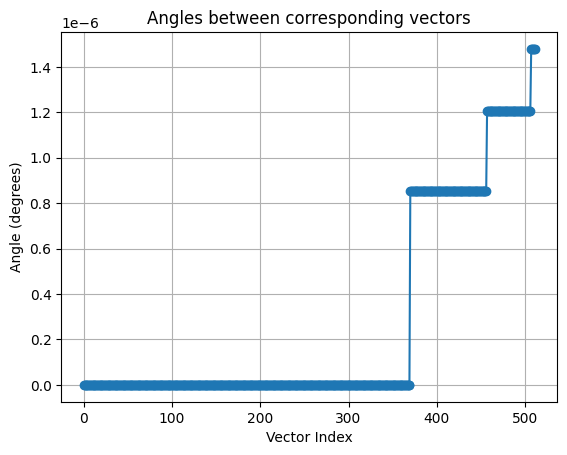

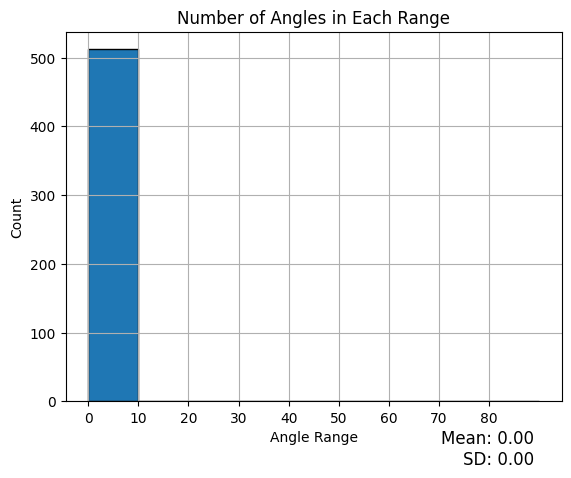

In [4]:
model_sampled = SampledNet()
model_sampled.fit(dataset.X_train, _, model_swim_base, radius=0, layer2="classic")

y_sampled = model_sampled.predict(dataset.X_test)
print(loss_mse(y_predict, y_sampled))

plot_vector_differences([model_sampled.weights[0]], [model_swim_base.weights[0]])